## Importing the necessary libraries

In [327]:
import numpy as np
import pandas as pd
import matplotlib as mlp
import matplotlib.pyplot as plt
import seaborn as sns

In [295]:
#loading csv data to pandas dataframe
df=pd.read_csv(r"C:\Users\DELL\Documents\Snehal DS\Snehal Projects\Automobile data (ML)\Automobile price data _Raw_.csv")

## Data understanding and preprocessing

In [296]:
#return first 5 rows of the columns
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [297]:
#This will print some summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [298]:
#Identify missing values- this data has some '?' so we are replacing that '?' with 'np.nan'.
df.replace("?", np.nan, inplace=True)

In [299]:
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [300]:
#Evaluating missing vlues
missing_data=df.isnull()
missing_data.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [301]:
#Counting missing values in each rows
df.isnull().sum()


symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

**Methods to handle missing values:**
1. Imputation - Replacing with central tendencies(mean,mode,median)
2. Dropping -Drop the whole row or column

In [302]:
#Replace "NaN" in "normalized-losses","bore","stroke ","horsepower","peak-rpm" columns with the mean of their column

column=["normalized-losses","bore","stroke","horsepower","peak-rpm"]
for column in column:
    avg=df[column].astype("float").mean(axis=0)
    df[column].replace(np.nan,avg,inplace=True)

In [303]:
#Replace "NaN" in "num-of-doors" with most frequent class of their column
#idxmax()-method automatically calculate the most frequent type

df["num-of-doors"].value_counts().idxmax()


'four'

In [304]:
df["num-of-doors"].replace(np.nan,"four",inplace=True)


In [305]:
#For "price" column we are dropping that rows with np.nan values
df.dropna(subset=["price"], axis=0, inplace=True)

#reset index because we have droped rows here
df.reset_index(drop=True,inplace=True)

In [306]:
#checking for null values again
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [307]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

As we can see that, some columns are not of a correct datatypes. Numerical variable should have a datatype float or int
and variable with string such as categories should have type object. for ex. bore and stroke columns contain numerical values so we should expect them to be float or int. however they are shown as a type object. we have to convert such data types into 
a proper format using astype() method.

In [308]:
#converting datatypes of numeric column from "object" to "float" or "int"

df[["bore","stroke"]]=df[["bore","stroke"]].astype("float")
df[["normalized-losses"]]=df[["normalized-losses"]].astype("int")
df[["price","peak-rpm"]]=df[["price","peak-rpm"]].astype("float")
df[["horsepower"]]=df[["horsepower"]].astype("int")

In [309]:
#lets check the dtypes after conversion
df.dtypes

symboling              int64
normalized-losses      int32
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int32
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

## Statistical analysis

In [324]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,174.200995,65.889055,53.766667,2555.666667,126.875622,3.330692,3.256874,10.164279,103.402985,5117.665368,25.179104,30.686567,13207.129353
std,1.254802,31.99625,6.066366,12.322175,2.101471,2.447822,517.296727,41.546834,0.268072,0.316048,4.004965,37.365650,478.113805,6.423220,6.815150,7947.066342
min,-2.000000,65.00000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.00000,94.500000,166.800000,64.100000,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,122.00000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000
75%,2.000000,137.00000,102.400000,183.500000,66.600000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.00000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000


## Exploratory Data Analysis

When we will visualizing individual variables it is important to first understand what type of variable we are dealing with 

In [310]:
#Potential predictor variable- finding potential predictor variable for price
#finding corelation
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008153,-0.182196,0.075810,0.279740,-0.035527,0.036233,-0.082391
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055045,-0.114713,0.217300,0.239543,-0.225016,-0.181877,0.133999
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158018,0.250313,0.371178,-0.360305,-0.470606,-0.543304,0.584642
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.123952,0.159733,0.579795,-0.285970,-0.665192,-0.698142,0.690628
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188822,0.189867,0.615056,-0.245800,-0.633531,-0.680635,0.751265
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.060663,0.259737,-0.087001,-0.309974,-0.049800,-0.104812,0.135486
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167438,0.156433,0.757981,-0.279361,-0.749543,-0.794889,0.834415
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.205928,0.028889,0.822668,-0.256733,-0.650546,-0.679571,0.872335
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566903,-0.267392,-0.582027,-0.591309,0.543155
stroke,-0.008153,0.055045,0.158018,0.123952,0.188822,-0.060663,0.167438,0.205928,-0.055390,1.000000,0.187871,0.098128,-0.063561,-0.033956,-0.034636,0.082269


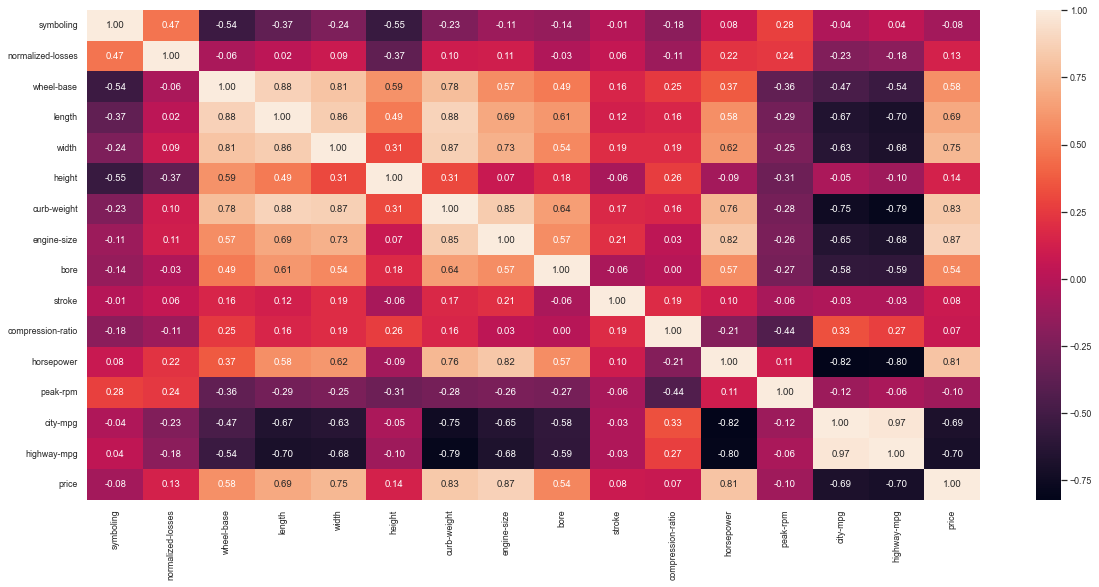

In [311]:
corr = df.corr()
plt.figure(figsize=(20,9))
a = sns.heatmap(corr, annot=True, fmt='.2f')
sns.set(font_scale=0.8)

**Findings**

1. curb-weight, engine-size, horsepower are positively corelated.
2. city-mpg,highway-mpg are negatively corelated

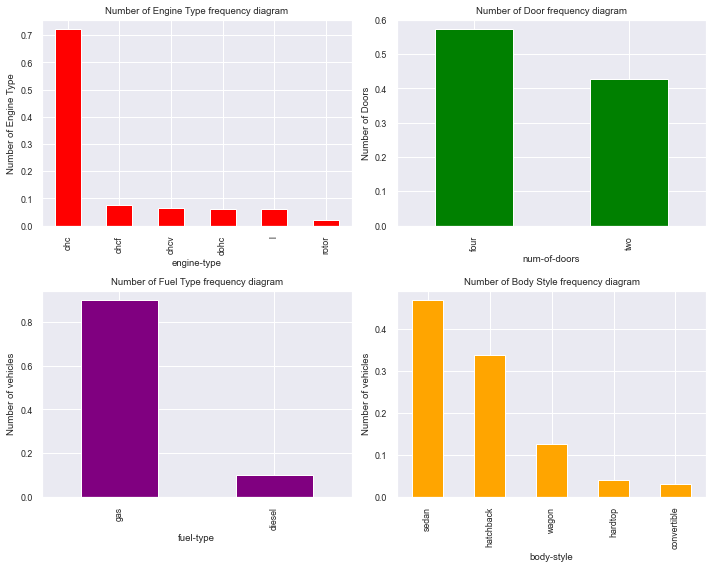

In [326]:
plt.figure(1)
plt.subplot(221)
df['engine-type'].value_counts(normalize=True).plot(figsize=(10,8),kind='bar',color='red')
plt.title("Number of Engine Type frequency diagram")
plt.ylabel('Number of Engine Type')
plt.xlabel('engine-type');


plt.subplot(222)
df['num-of-doors'].value_counts(normalize=True).plot(figsize=(10,8),kind='bar',color='green')
plt.title("Number of Door frequency diagram")
plt.ylabel('Number of Doors')
plt.xlabel('num-of-doors');

plt.subplot(223)
df['fuel-type'].value_counts(normalize= True).plot(figsize=(10,8),kind='bar',color='purple')
plt.title("Number of Fuel Type frequency diagram")
plt.ylabel('Number of vehicles')
plt.xlabel('fuel-type');

plt.subplot(224)
df['body-style'].value_counts(normalize=True).plot(figsize=(10,8),kind='bar',color='orange')
plt.title("Number of Body Style frequency diagram")
plt.ylabel('Number of vehicles')
plt.xlabel('body-style');
plt.tight_layout()
plt.show()


**Findings**

1. More than 70 % of the vehicle has Ohc type of Engine
2. 57% of the cars has 4 doors
3. Gas is preferred by 85 % of the vehicles
4. Most produced vehicle are of body style sedan around 48% followed by hatchback 32%

Text(0.5, 1.0, 'Price vs curb-weight')

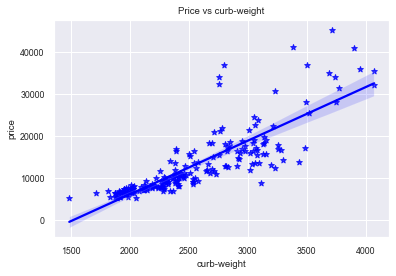

In [312]:
b = sns.regplot(x="curb-weight", y="price", data=df, color="blue", marker="*")
b.set_title("Price vs curb-weight")

Text(0.5, 1.0, 'price vs engine size')

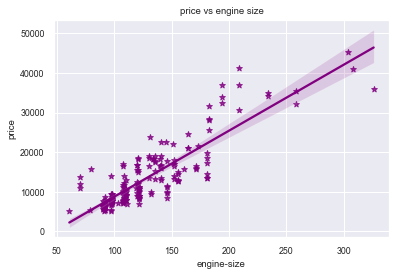

In [313]:
#Visualizing the linear relationship for possible predictor variable
a=sns.regplot(x="engine-size", y="price", data=df, color="purple", marker="*")
a.set_title("price vs engine size")

Text(0.5, 1.0, 'Price vs horsepower')

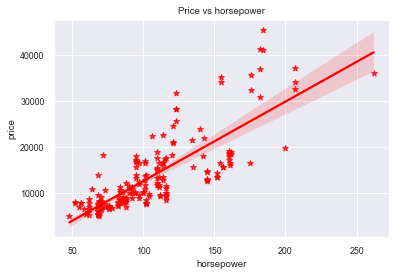

In [314]:
c = sns.regplot(x="horsepower", y="price", data=df, color="red", marker="*")
c.set_title("Price vs horsepower")

Text(0.5, 1.0, 'Price vs city-mpg')

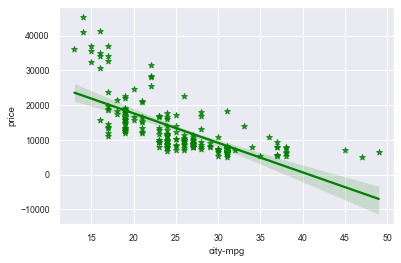

In [315]:
d = sns.regplot(x="city-mpg", y="price", data=df, color="green", marker="*")
c.set_title("Price vs city-mpg")


Text(0.5, 1.0, 'Price vs highway-mpg')

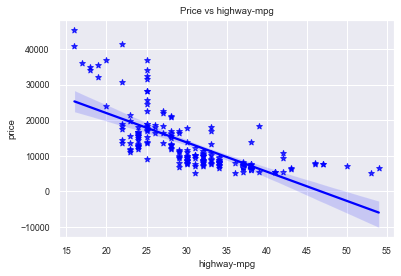

In [316]:
e=c = sns.regplot(x="highway-mpg", y="price", data=df, color="blue", marker="*")
c.set_title("Price vs highway-mpg")

**Findings**
1. Engine size and curb-weight is positively co realted with price
2. Price increses when increses in engine size, curb-weigh and horsepower 
3. Similarly when price increses their is increse in highway-mpg and city-mpg  

<AxesSubplot:xlabel='body-style', ylabel='price'>

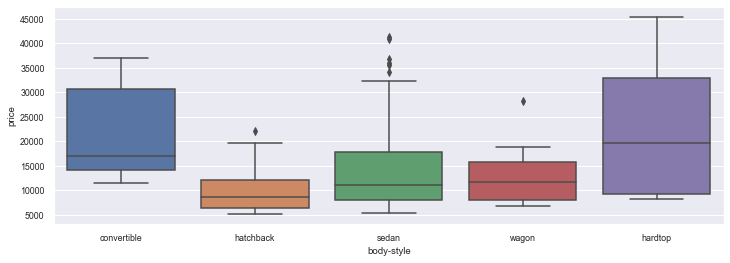

In [317]:
#Findng potential caegorical predictor variable for price
plt.figure(figsize=(12,4))
sns.boxplot(x='body-style', y="price", data=df)

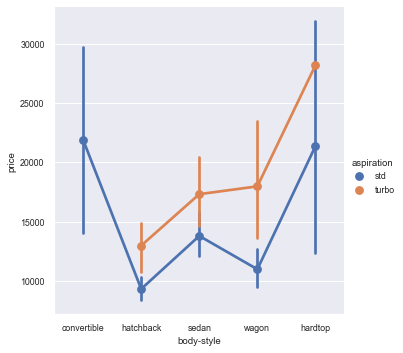

In [318]:
sns.catplot(data=df, x="body-style", y="price", hue="aspiration" ,kind="point")

**Findings**

As we can see that the distribution of price between the different body style.
Categories have a significant overlaps so body style is not a good predictor for price.

1. Hardtop model are expensive in prices followed by convertible and sedan body style
2. Turbo models have higher prices than for the standard model
3. Convertible has only standard edition with expensive cars
4. hatchback and sedan turbo models are available below 20000

<AxesSubplot:xlabel='engine-location', ylabel='price'>

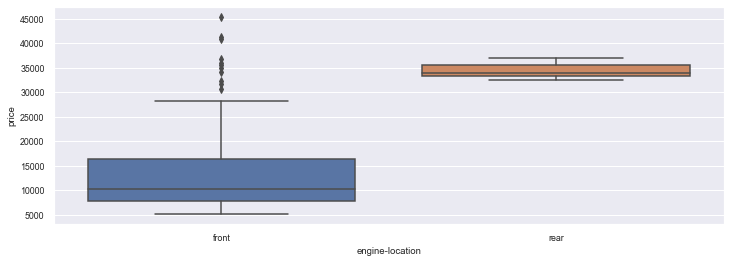

In [319]:
plt.figure(figsize=(12,4))
sns.boxplot(x='engine-location', y="price", data=df)

**Findings** Here we can see that the distribution of price between these two engine location categoies, front and rear are distinct enough to take engine location as a potential good predictor for price .



<AxesSubplot:xlabel='drive-wheels', ylabel='price'>

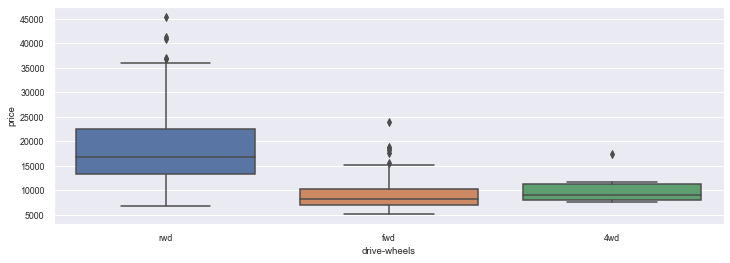

In [320]:
plt.figure(figsize=(12,4))
sns.boxplot(x='drive-wheels', y="price", data=df)

**Findings** Here we can see that the distribution of price between the different drive wheels.
Drive wheel could potentially be a predictor for price
1. rwd wheel drive vehicle have expensive prices

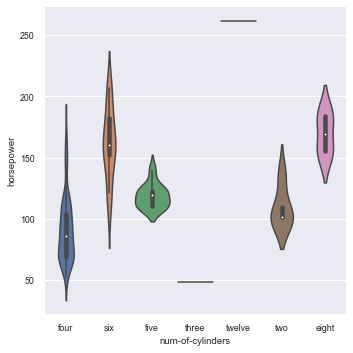

In [321]:
sns.catplot(data=df, x="num-of-cylinders", y="horsepower",kind="violin")

**Findings** Vehicle with above 200 horsepower has Eight Twelve Six cyclinders

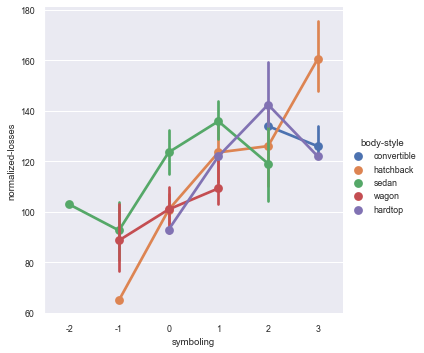

In [322]:
sns.catplot(data=df, y="normalized-losses", x="symboling" , hue="body-style" ,kind="point")

**Findings**

Note :- here +3 means risky vehicle and -2 means safe vehicle

1. Increased in risk rating linearly increases in normalised losses in vehicle
2. covertible car and hardtop car has mostly losses with risk rating above 0
3. hatchback cars has highest losses at risk rating 3
4. sedan and Wagon car has losses even in less risk (safe)rating

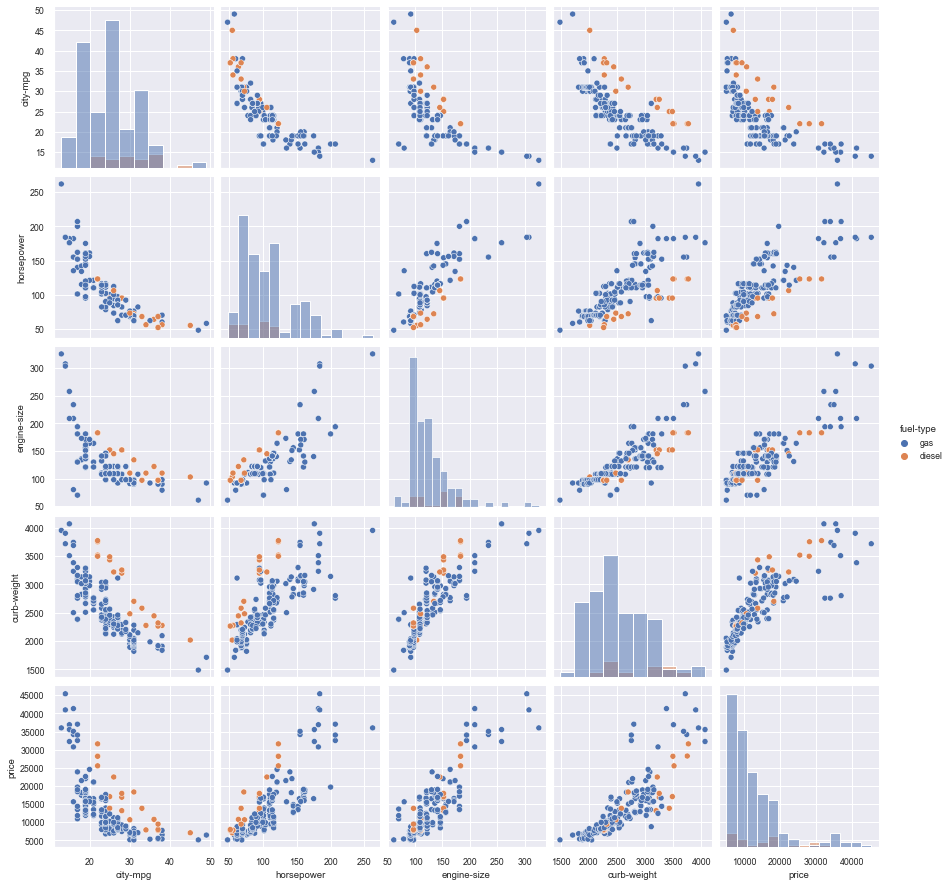

In [323]:
pairplot = sns.pairplot(df[["city-mpg", "horsepower", "engine-size", "curb-weight","price", "fuel-type"]], hue="fuel-type", diag_kind="hist")

**Findings**

1. Vehicle Mileage decrease as increase in Horsepower , engine-size, Curb Weight
2. As horsepower increase the engine size increases
3. Curbweight increases with the increase in Engine Size
4. engine size and curb-weight is positively co realted with price
5. city-mpg is negatively corelated with price 
6. As increase horsepower reduces the mileage